
# Проект: Анализ интернет-магазина. #

# Описание проекта #
## Контекст ##

Вы — аналитик крупного интернет-магазина. Вместе с отделом маркетинга вы подготовили список гипотез для увеличения выручки.
Приоритизируйте гипотезы, запустите A/B-тест и проанализируйте результаты.

## Задачи и план ##

### Часть 1. Приоритизация гипотез: ###
1. Применить фреймворк ICE для приоритизации гипотез. Отсортировать их по убыванию приоритета.
2. Применить фреймворк RICE для приоритизации гипотез. Отсортировать их по убыванию приоритета.
3. Указать, как изменилась приоритизация гипотез при применении RICE вместо ICE. Объяснить, почему так произошло.

### Часть 2. Анализ A/B-теста: ###
Проанализировать A/B-тест:

1. Построить график кумулятивной выручки по группам. Сделать выводы и предположения.
2. Построить график кумулятивного среднего чека по группам. Сделать выводы и предположения.
3. Построить график относительного изменения кумулятивного среднего чека группы B к группе A. Сделать выводы и предположения.
4. Построить график кумулятивной конверсии по группам. Сделать выводы и предположения.
5. Построить график относительного изменения кумулятивной конверсии группы B к группе A. Сделать выводы и предположения.
6. Построить точечный график количества заказов по пользователям. Сделать выводы и предположения.
7. Посчитать 95-й и 99-й перцентили количества заказов на пользователя. Выбрать границу для определения аномальных пользователей.
8. Посчитать точечный график стоимостей заказов. Сделать выводы и предположения.
9. Посчитать 95-й и 99-й перцентили стоимости заказов. Выбрать границу для определения аномальных заказов.
10. Посчитать статистическую значимость различий в конверсии между группами по «сырым» данным. Сделать выводы и предположения.
11. Посчитать статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным. Сделать выводы и предположения.
12. Посчитать статистическую значимость различий в конверсии между группами по «очищенным» данным. Сделать выводы и предположения.
13. Посчитать статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным. Сделать выводы и предположения.
14.Принять решение по результатам теста и объясните его. Варианты решений: 1. Остановить тест, зафиксировать победу одной из групп. 2. Остановить тест, зафиксировать отсутствие различий между группами. 3. Продолжить тест.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from scipy import stats as st
import math
import numpy as np
import datetime as dt


In [2]:
df_hypothesis = pd.read_csv('/datasets/hypothesis.csv')
df_orders = pd.read_csv('/datasets/orders.csv')
df_visitors = pd.read_csv('/datasets/visitors.csv')

In [3]:
pd.set_option('display.max_colwidth', 500)
df_hypothesis


,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


In [4]:
df_hypothesis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
Hypothesis    9 non-null object
Reach         9 non-null int64
Impact        9 non-null int64
Confidence    9 non-null int64
Efforts       9 non-null int64
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


In [5]:
pd.set_option('display.max_colwidth', 500)
df_hypothesis.columns = df_hypothesis.columns.str.lower()
df_hypothesis.head(2)


,hypothesis,reach,impact,confidence,efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10


In [6]:
pd.set_option('display.max_colwidth', 500)
df_hypothesis['ice_score'] = round((df_hypothesis['impact'] * df_hypothesis['confidence']) / df_hypothesis['efforts'], 2)
df_hypothesis.sort_values(by = 'ice_score', ascending=False)

,hypothesis,reach,impact,confidence,efforts,ice_score
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.20
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.33
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.20
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3,8.00
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3,7.00
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,2.00
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,1.33
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,1.12
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,1.00


In [7]:
pd.set_option('display.max_colwidth', 500)
df_hypothesis['rice_score'] = round((df_hypothesis['reach'] * df_hypothesis['impact'] * df_hypothesis['confidence']) / df_hypothesis['efforts'], 2)
df_hypothesis.sort_values(by = 'rice_score', ascending=False)

,hypothesis,reach,impact,confidence,efforts,ice_score,rice_score
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.20,112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3,7.00,56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.33,40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3,8.00,40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.20,16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,1.12,9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,2.00,4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,1.33,4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,1.00,3.0


Некоторые гипотезы остались примерно на своем месте (1,3,4,5), но несколько изменился порядок. Но есть и большие "скачки" по значимости (например, 2 гипотеза).
Большие изменения произошли, т.к. в первом случае (ice_score) - охват пользователей, которых затронет изменение. Если само изменение незначительное, но при этом охватывает всех пользователей, например, как в случае с гипотезой "Добавить форму подписи на все основные страницы, чтобы собрать базу клиентов для емейл-рассылок", то оно будет высокую оценку по показателю приоритетности. 

<div class="alert alert-success">

**Комментарий ревьюера**
    
Ты корректно считаешь значения метрик и правильно определяешь порядок гипотез по приоритету.

Для полного отображения гипотез в таблицах рекомендую использовать надстройку **pd.set_option('display.max_colwidth', 500)**.
    
</div>

<div class="alert alert-info">
В первом случае, т.е. когда мы использовали приоритиpзацию гипотез по фреймворку ICE, то там в формуле не учитывается охват пользователей, которых затронет изменение (т.е. reach). "Большие изменения", т.е. сильное смещение места гипотезы во фреймворке RICE относительно ее места во фреймворке ICE. Из таких гипотез, которые значительно поменяли свое положение выделяется гипотеза № 2 (Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа) - перемещение с 5 на 2 место.
    
</div>


### Часть 2 (A/B-тестирование) ###

Смотрим таблицу заказов и визитов. Меняем неправильные типы данных, названия столбцов делаем без заглавных букв, чтобы было удобнее.

In [8]:
df_orders.head()

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


In [9]:
df_orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
transactionId    1197 non-null int64
visitorId        1197 non-null int64
date             1197 non-null object
revenue          1197 non-null int64
group            1197 non-null object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


In [10]:
df_orders['date'] = df_orders['date'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))
df_orders.columns = df_orders.columns.str.lower()
df_orders.head(2)


,transactionid,visitorid,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B


In [11]:
df_visitors.head()

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


In [12]:
df_visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
date        62 non-null object
group       62 non-null object
visitors    62 non-null int64
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


In [13]:
df_visitors['date'] = df_visitors['date'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))
df_visitors.head(2)


,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619


In [14]:
print(df_visitors.duplicated().sum()) 
print(df_orders.duplicated().sum()) 

0
0


<div class="alert alert-info">
Пропусков в двух таблицах нет.

Дубликатов тоже е обнаружено.    
    
</div>


<div class="alert alert-success">

**Комментарий ревьюера v2**
    
Верно :)
    
</div>

Делаем таблицу с датами по дням и группой тестирования. Далее находим на каждое число накопленное количество заказов, количество уникальных покупателей, накопленная стоимость покупки (все показатели сравниваются по строке даты, т.е. смотрят по дате на конец каждого дня и отдельно по каждой группе). С заказами тоже самое, только там проставляется количество посетителей, накопленных к определенной дате.

In [15]:
datesGroups = df_orders[['date','group']].drop_duplicates() 
datesGroups

,date,group
0,2019-08-15,B
2,2019-08-15,A
45,2019-08-16,A
47,2019-08-16,B
55,2019-08-01,A
...,...,...
1068,2019-08-12,A
1114,2019-08-13,B
1116,2019-08-13,A
1149,2019-08-14,B


In [16]:
ordersAggregated = datesGroups.apply(lambda x: df_orders[np.logical_and(df_orders['date'] <= x['date'], df_orders['group'] == x['group'])]\
    .agg({'date' : 'max', 'group' : 'max', 'transactionid' : pd.Series.nunique, 'visitorid' : pd.Series.nunique, 'revenue' : 'sum'}), axis=1)\
    .sort_values(by=['date','group'])
ordersAggregated

,date,group,transactionid,visitorid,revenue
55,2019-08-01,A,24,20,148579
66,2019-08-01,B,21,20,101217
175,2019-08-02,A,44,38,242401
173,2019-08-02,B,45,43,266748
291,2019-08-03,A,68,62,354874
...,...,...,...,...,...
496,2019-08-29,B,596,544,5559398
730,2019-08-30,A,545,493,4022970
690,2019-08-30,B,620,567,5774631
958,2019-08-31,A,557,503,4084803


In [17]:
visitorsAggregated = datesGroups.apply(lambda x: df_visitors[np.logical_and(df_visitors['date'] <= x['date'], df_visitors['group'] == x['group'])]\
    .agg({'date' : 'max', 'group' : 'max', 'visitors' : 'sum'}), axis=1).sort_values(by=['date','group'])
visitorsAggregated

,date,group,visitors
55,2019-08-01,A,719
66,2019-08-01,B,713
175,2019-08-02,A,1338
173,2019-08-02,B,1294
291,2019-08-03,A,1845
...,...,...,...
496,2019-08-29,B,17708
730,2019-08-30,A,18037
690,2019-08-30,B,18198
958,2019-08-31,A,18736


In [18]:
cumulativeData = ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cumulativeData.columns = ['date', 'group', 'transactionid', 'visitorid', 'revenue', 'visitors']


cumulativeData.rename(columns={'transactionid':'n_transactions', 'visitorid':'unique_buyers'}, inplace=True)
cumulativeData.head(5)

,date,group,n_transactions,unique_buyers,revenue,visitors
0,2019-08-01,A,24,20,148579,719
1,2019-08-01,B,21,20,101217,713
2,2019-08-02,A,44,38,242401,1338
3,2019-08-02,B,45,43,266748,1294
4,2019-08-03,A,68,62,354874,1845


Сделали таблицу с кумулятивными показателями по посетителям, покупателям, заказам, стоимости на каждый день в разрезе по группам. Теперь можно приступать к построению графиков.


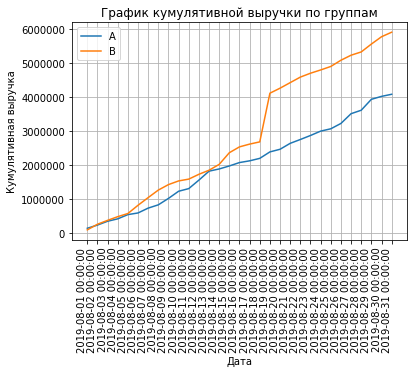

In [19]:
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'n_transactions']]

cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'n_transactions']]

plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')
plt.title('График кумулятивной выручки по группам')
plt.xlabel('Дата')
plt.ylabel('Кумулятивная выручка')
plt.grid(True)
plt.legend()
plt.gca().set_xticks(cumulativeRevenueA['date'])
plt.gca().set_xticklabels(cumulativeRevenueA['date'], rotation=90, horizontalalignment= 'right');

<div class="alert alert-success">

**Комментарий ревьюера v2**
    
Отлично!
    
</div>

Группа B изначально опережала с незначительным отрывом группу А по выручке, но затем (примерно с 2019-08-19) начала сильный отрыв от группы А. (Возможно, здесь произошли какие-то большие покупки в группе B, что отразилось таким скачком на графике)

Находим средний чек и строим график.

In [20]:
cumulativeRevenueA['avg_bill'] = round(cumulativeRevenueA['revenue'] / cumulativeRevenueA['n_transactions'], 2)
cumulativeRevenueA.head()

,date,revenue,n_transactions,avg_bill
0,2019-08-01,148579,24,6190.79
2,2019-08-02,242401,44,5509.11
4,2019-08-03,354874,68,5218.74
6,2019-08-04,425699,84,5067.85
8,2019-08-05,549917,109,5045.11


In [21]:
cumulativeRevenueB['avg_bill'] = round(cumulativeRevenueB['revenue'] / cumulativeRevenueB['n_transactions'], 2)
cumulativeRevenueB.head()

,date,revenue,n_transactions,avg_bill
1,2019-08-01,101217,21,4819.86
3,2019-08-02,266748,45,5927.73
5,2019-08-03,380996,61,6245.84
7,2019-08-04,489567,78,6276.50
9,2019-08-05,581995,101,5762.33


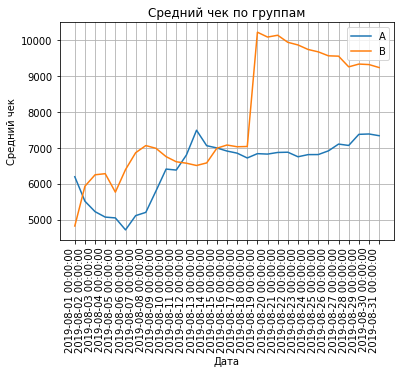

In [22]:
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['avg_bill'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['avg_bill'], label='B')
plt.legend() 
plt.title('Средний чек по группам')
plt.xlabel('Дата')
plt.ylabel('Средний чек')
plt.grid(True)
plt.legend() 
plt.gca().set_xticks(cumulativeRevenueA['date'])
plt.gca().set_xticklabels(cumulativeRevenueA['date'], rotation=90, horizontalalignment= 'right');


Группа B показывает результат лучше, чем группа А. Здесь видны колебания среднего чека на старте. Примерно на уровне 2019-08-19 ситуация стабилизировалась. Здесь опять же виден этот скачок по среднему чеку. 

Смотрим график относительного изменения кумулятивного среднего чека группы B к группе A.

In [23]:
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])
mergedCumulativeRevenue.head()

,date,revenueA,n_transactionsA,avg_billA,revenueB,n_transactionsB,avg_billB
0,2019-08-01,148579,24,6190.79,101217,21,4819.86
1,2019-08-02,242401,44,5509.11,266748,45,5927.73
2,2019-08-03,354874,68,5218.74,380996,61,6245.84
3,2019-08-04,425699,84,5067.85,489567,78,6276.50
4,2019-08-05,549917,109,5045.11,581995,101,5762.33


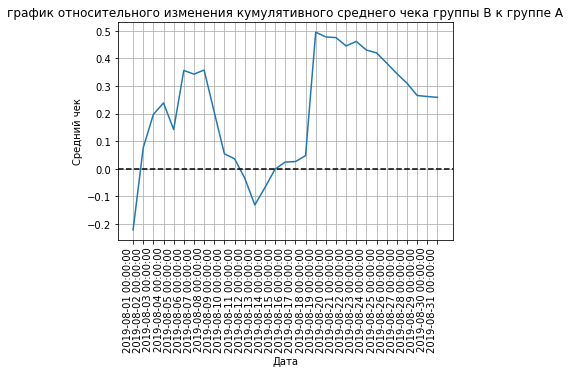

In [24]:
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['avg_billB']/mergedCumulativeRevenue['avg_billA'])-1)

plt.axhline(y=0, color='black', linestyle='--') 


plt.title('график относительного изменения кумулятивного среднего чека группы B к группе A')
plt.xlabel('Дата')
plt.ylabel('Средний чек')
plt.grid(True)
plt.gca().set_xticks(cumulativeRevenueA['date'])
plt.gca().set_xticklabels(mergedCumulativeRevenue['date'], rotation=90, horizontalalignment= 'right');

Здесь более наглядно видно, что на протяжении всего времени за исключением коротких периодов группа B показывала результат по кумулятивному среднему чеку лучше, чем группа А.

<div class="alert alert-success">

**Комментарий ревьюера**
    
Здорово, что ты обращаешь внимание на скачок в графиках выручки и среднего чека. Здесь было бы здорово **уделить больше внимания их причинам**.
    
**На резкие скачки выручки могут повлиять, как аномально большие заказы, так и большое количество обычных заказов**. То есть по графику выручки мы можем выдвигать более широкий спектр предположений о скачке.
    
А вот уже по анализу графиков конверсии и среднего чека становится понятнее. Ведь **аномально большие заказы влияют именно на средний чек**, а **большое количество заказов - на конверсию**. 
    
По выручке - мы можем строить более широкие предположения, по среднему чеку - объяснить скачок аномально большим заказом (заказами). 
    
</div>

<div class="alert alert-info">
Согласен, по поводу причин, я это отметил немного ниже, что из-за нескольких выбросов все показатели (выручка и средний чек) резко уходят вверх. Когда исследовал выбросы по выручке, то обнаружил 2 очень весомых выброса - в ответке около 1300000 у.е. и в отметке 200000 у.е., видимо, эти выбросы повлияли на наши графики.
    
</div>


<div class="alert alert-success">

**Комментарий ревьюера v2**
    
Всё верно. Ниже мы точно можем ответить на этот вопрос. А здесь только сделать предположения.
    
</div>

Считаем конверсию. (Делим количество заказов на количество посещений).

In [25]:
cumulativeData.head()

,date,group,n_transactions,unique_buyers,revenue,visitors
0,2019-08-01,A,24,20,148579,719
1,2019-08-01,B,21,20,101217,713
2,2019-08-02,A,44,38,242401,1338
3,2019-08-02,B,45,43,266748,1294
4,2019-08-03,A,68,62,354874,1845


In [26]:
cumulativeData['conversion'] = round(cumulativeData['n_transactions'] / cumulativeData['visitors'], 4)
cumulativeData.head()

,date,group,n_transactions,unique_buyers,revenue,visitors,conversion
0,2019-08-01,A,24,20,148579,719,0.0334
1,2019-08-01,B,21,20,101217,713,0.0295
2,2019-08-02,A,44,38,242401,1338,0.0329
3,2019-08-02,B,45,43,266748,1294,0.0348
4,2019-08-03,A,68,62,354874,1845,0.0369


In [27]:
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']

cumulativeDataA.head()

,date,group,n_transactions,unique_buyers,revenue,visitors,conversion
0,2019-08-01,A,24,20,148579,719,0.0334
2,2019-08-02,A,44,38,242401,1338,0.0329
4,2019-08-03,A,68,62,354874,1845,0.0369
6,2019-08-04,A,84,77,425699,2562,0.0328
8,2019-08-05,A,109,100,549917,3318,0.0329


In [28]:
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']
cumulativeDataB.head()

,date,group,n_transactions,unique_buyers,revenue,visitors,conversion
1,2019-08-01,B,21,20,101217,713,0.0295
3,2019-08-02,B,45,43,266748,1294,0.0348
5,2019-08-03,B,61,59,380996,1803,0.0338
7,2019-08-04,B,78,75,489567,2573,0.0303
9,2019-08-05,B,101,98,581995,3280,0.0308


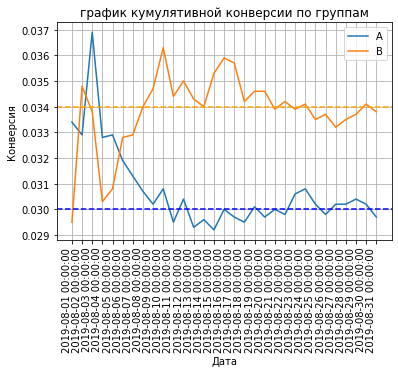

In [29]:
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')
plt.legend() 
plt.title('график кумулятивной конверсии по группам')
plt.xlabel('Дата')
plt.ylabel('Конверсия')
plt.grid(True)
plt.legend() 
plt.gca().set_xticks(cumulativeRevenueA['date'])
plt.gca().set_xticklabels(cumulativeRevenueA['date'], rotation=90, horizontalalignment= 'right')
plt.axhline(y=0.034, color='orange', linestyle='--')
plt.axhline(y=0.030, color='blue', linestyle='--');

Вот одна из причин, почему у группы B дела лучше, чем у группы А. Конверсия у B после стабилизации выше, чем у А. (хотя у B и бОльшие перепады, и времени на стабилизацию ушло тоже больше) Смотрим по относительному графику.

In [30]:
mergedCumulativeConversions = cumulativeDataA[['date','conversion']].merge(cumulativeDataB[['date','conversion']], left_on='date', right_on='date', how='left', suffixes=['A', 'B'])
mergedCumulativeConversions.tail()


,date,conversionA,conversionB
26,2019-08-27,0.0302,0.0332
27,2019-08-28,0.0302,0.0335
28,2019-08-29,0.0304,0.0337
29,2019-08-30,0.0302,0.0341
30,2019-08-31,0.0297,0.0338


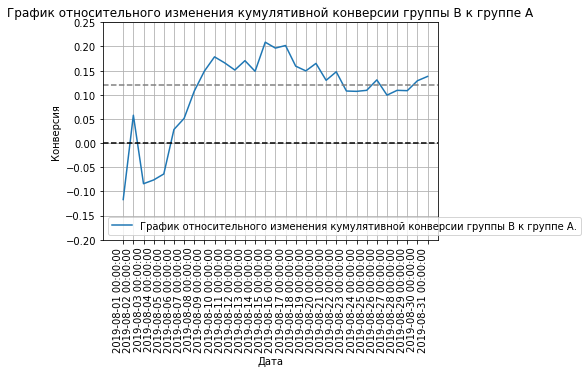

In [31]:
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
plt.plot(mergedCumulativeConversions['date'], mergedCumulativeConversions['conversionB'] / mergedCumulativeConversions['conversionA'] - 1, label="График относительного изменения кумулятивной конверсии группы B к группе A.")
plt.legend()

plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=0.12, color='grey', linestyle='--')
plt.axis(["2019-07-30", "2019-09-01", -0.2, 0.25]) 


plt.title('График относительного изменения кумулятивной конверсии группы B к группе A')
plt.xlabel('Дата')
plt.ylabel('Конверсия')
plt.grid(True)
plt.legend() 
plt.gca().set_xticks(cumulativeRevenueA['date'])
plt.gca().set_xticklabels(mergedCumulativeConversions['date'], rotation=90, horizontalalignment= 'right');

По относительному графику снова видим, что большую часть времени группа B лидировала по конверсии. 


<div class="alert alert-success">

**Комментарий ревьюера**
    
Выводы по конверсии корректные. Отлично, что дополнительно отмечаешь на графике те значения, колоко которых стабилизируются показатели. Стоило обратить на это внимание в выводе.
    
</div>

Строим точечный график количества заказов на 1 покупателя. 

In [32]:
df_orders.head()

,transactionid,visitorid,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


In [33]:
orders_by_users = df_orders.groupby('visitorid', as_index=False).agg({'transactionid': 'nunique'})
orders_by_users = orders_by_users.rename(columns=({'transactionid': 'orders_count'}))
orders_by_users.head()                       

,visitorid,orders_count
0,5114589,1
1,6958315,1
2,8300375,2
3,11685486,1
4,39475350,1


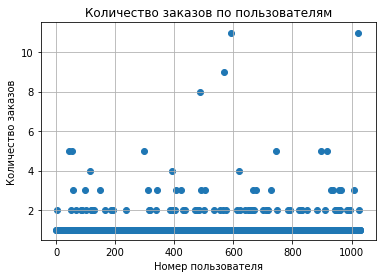

In [34]:
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
x_values = pd.Series(range(0,len(orders_by_users['orders_count'])))
plt.scatter(x_values, orders_by_users['orders_count']) 

plt.title('Количество заказов по пользователям')
plt.xlabel('Номер пользователя')
plt.ylabel('Количество заказов')
plt.grid(True);



Наибольшая плотность на уровне 1 заказа. Относительно немного совершают 2 и 3 покупки. 4 и более - это уже крайне редкие случаи.
Находим процентили, чтобы удостовериться в правильности наших выводов.

In [35]:
print('90 перцентиль: %.2f' % (np.percentile(orders_by_users['orders_count'], [90])))
print('95 перцентиль: %.2f' % (np.percentile(orders_by_users['orders_count'], [95])))
print('99 перцентиль: %.2f' % (np.percentile(orders_by_users['orders_count'], [99])))

90 перцентиль: 1.00
95 перцентиль: 2.00
99 перцентиль: 4.00


Абсолютно верно! Только 10% берут больше 1 заказа, только 5% покупателей делают 2 заказа и более, а от 4 и более делает только 1% покупателей. (Видимо, конверсия в повторную покупку у них не самая высокая)

Смотрим, график стоимости чека.

In [36]:
revenue_by_users = df_orders.groupby('visitorid')['revenue']
revenue_by_users.head()                       

0         1650
1          730
2          400
3         9759
4         2308
         ...  
1192      6490
1193      3190
1194     10550
1195       100
1196    202740
Name: revenue, Length: 1178, dtype: int64

In [37]:
df_orders.head()

,transactionid,visitorid,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


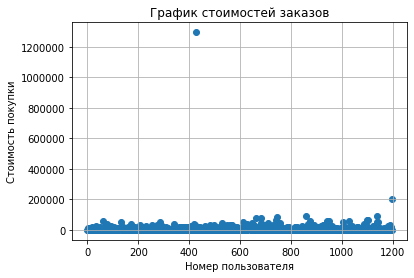

In [38]:
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
x_values_revenue = pd.Series(range(0,len(df_orders['revenue'])))
plt.scatter(x_values_revenue, df_orders['revenue']) 

plt.title('График стоимостей заказов')
plt.xlabel('Номер пользователя')
plt.ylabel('Стоимость покупки')
plt.grid(True);



In [39]:
df_orders['revenue'].max()

1294500

На графике видно 2 явных выброса в отметке около 1300000 и еще 1 в отметке 200000. Можно попробовать построить график без них, чтобы посмотреть на распределение остальных стоимостей более наглядно.


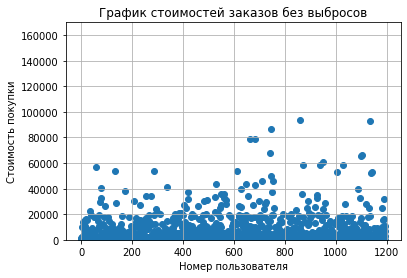

In [40]:
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
x_values_revenue = pd.Series(range(0,len(df_orders['revenue'])))
plt.scatter(x_values_revenue, df_orders['revenue']) 

plt.title('График стоимостей заказов без выбросов')
plt.xlabel('Номер пользователя')
plt.ylabel('Стоимость покупки')
plt.grid(True)


axes = plt.gca()

axes.set_ylim([0,170000]);

In [41]:
print('90 перцентиль: %.2f' % (np.percentile(df_orders['revenue'], [90])))
print('95 перцентиль: %.2f' % (np.percentile(df_orders['revenue'], [95])))
print('99 перцентиль: %.2f' % (np.percentile(df_orders['revenue'], [99])))

90 перцентиль: 18168.00
95 перцентиль: 28000.00
99 перцентиль: 58233.20


Вот так более наглядно. До 20000 у.е. очень плотный график, а далее - сильно разреженный. 
Также можно отметить 90-ый, 95-ый и 99-ый перцентиль.
Только 10 процентов пользователей покупают на сумму более 18168 у.е.; на сумму 28000 - покупают 5% пользователей; и 1 % пользователей покупает на сумму 58233 у.е..
Если в покупку на 200000 еще можно поверить, то интересно, что за оптовая покупка была на 1300000 у.е. (есть предположение, что это был просто какой-нибудь тест функционала покупки на крупную сумму, т.к. если 99% чеков не доходят до отметки в 60000, видеть такую цифру немного странно).


<div class="alert alert-info">
На мой взгляд, можно отсечь значения по чеку больше 40000 (т.к. выше этой отметки на точечном графике, который строили ранее, плотность низкая), следовательно, отсечем от 1 до 5% (скорее всего, где-то около 2-3%) по этому параметру.
Также найдем выбросы по количеству заказов на 1 посетителя.    
</div>

In [42]:
orders_by_users.head()

,visitorid,orders_count
0,5114589,1
1,6958315,1
2,8300375,2
3,11685486,1
4,39475350,1


In [43]:
print('90 перцентиль: %.4f' % (np.percentile(orders_by_users['orders_count'], [90])))
print('95 перцентиль: %.4f' % (np.percentile(orders_by_users['orders_count'], [95])))
print('99 перцентиль: %.4f' % (np.percentile(orders_by_users['orders_count'], [99])))


90 перцентиль: 1.0000
95 перцентиль: 2.0000
99 перцентиль: 4.0000


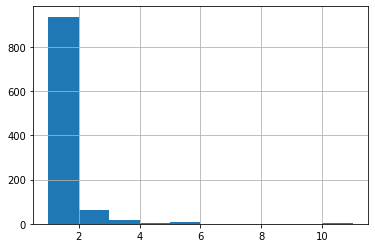

In [44]:
orders_by_users['orders_count'].hist()

<div class="alert alert-info">
Можно убрать тех клиентов, которые сделали больше 3 заказов, т.к. на графике распределения видно, что таких клиентов очень мало, и их можно считать за выбросы. (отсекаем по количеству заказов тоже от 1 до 5%, скорее всего, около 2%)


</div>



<div class="alert alert-success">

**Комментарий ревьюера**
    
Ты делаешь верные замечания при анализе аномалий. Здорово, что приводишь более детальный график по стоимости заказов, ограничив значения по осям. На таком графике действительно проще сделать вывод.
    
</div>

### Расчет статистической значимости. ###
Задачи с 10-14 содержат требование посчитать статистическую значимость различий разных показателей для очищенных и неочищенных данных. Поэтому сделаем новую таблицу, которая будет содержать группировку по датам, группам и кумулятивные показатели к каждой дате (заказы, посетители, выручка и т.д.).

In [45]:
df_visitors

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756
...,...,...,...
57,2019-08-27,B,720
58,2019-08-28,B,654
59,2019-08-29,B,531
60,2019-08-30,B,490


Создаем по группе А датасет с датами и посетителями, далее находим накопленный показатель посетителей на каждую дату.

In [46]:
visitorsADaily = df_visitors[df_visitors['group'] == 'A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']
visitorsADaily.head()

,date,visitorsPerDateA
0,2019-08-01,719
1,2019-08-02,619
2,2019-08-03,507
3,2019-08-04,717
4,2019-08-05,756


In [47]:
visitorsACummulative = visitorsADaily.apply(
    lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateA': 'sum'}
    ),
    axis=1,
)
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']
visitorsACummulative.tail()

,date,visitorsCummulativeA
26,2019-08-27,16376
27,2019-08-28,16970
28,2019-08-29,17547
29,2019-08-30,18037
30,2019-08-31,18736


Аналогично с группой B.

In [48]:
visitorsBDaily = df_visitors[df_visitors['group'] == 'B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

visitorsBCummulative = visitorsBDaily.apply(
    lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateB': 'sum'}
    ),
    axis=1,
)
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']
visitorsBCummulative.tail()

,date,visitorsCummulativeB
57,2019-08-27,16523
58,2019-08-28,17177
59,2019-08-29,17708
60,2019-08-30,18198
61,2019-08-31,18916


Смотрим, сколько в группе А было заказов на каждую дату, и какая суммарная выручка за день (эта информация нужна для 11 и 13 пункта со средним чеком). Далее находим кумулятивный показатель количества заказов и суммарную выручку к каждому дню.

In [49]:
df_orders.head()

,transactionid,visitorid,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


In [50]:
ordersADaily = (
    df_orders[df_orders['group'] == 'A'][['date', 'transactionid', 'visitorid', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionid': pd.Series.nunique, 'revenue': 'sum'})
)
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']
ordersADaily.head()



,date,ordersPerDateA,revenuePerDateA
0,2019-08-01,24,148579
1,2019-08-02,20,93822
2,2019-08-03,24,112473
3,2019-08-04,16,70825
4,2019-08-05,25,124218


In [51]:
ordersACummulative = ordersADaily.apply(
    lambda x: ordersADaily[ordersADaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateA': 'sum', 'revenuePerDateA': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersACummulative.columns = [
    'date',
    'ordersCummulativeA',
    'revenueCummulativeA',
]
ordersACummulative.tail()

,date,ordersCummulativeA,revenueCummulativeA
26,2019-08-27,495,3514698
27,2019-08-28,512,3615820
28,2019-08-29,534,3936510
29,2019-08-30,545,4022970
30,2019-08-31,557,4084803


С группой B аналогично.

In [52]:
ordersBDaily = (
    df_orders[df_orders['group'] == 'B'][['date', 'transactionid', 'visitorid', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionid': pd.Series.nunique, 'revenue': 'sum'})
)
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

ordersBCummulative = ordersBDaily.apply(
    lambda x: ordersBDaily[ordersBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateB': 'sum', 'revenuePerDateB': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersBCummulative.columns = [
    'date',
    'ordersCummulativeB',
    'revenueCummulativeB',
]
ordersBCummulative.tail()

,date,ordersCummulativeB,revenueCummulativeB
26,2019-08-27,548,5232260
27,2019-08-28,576,5328268
28,2019-08-29,596,5559398
29,2019-08-30,620,5774631
30,2019-08-31,640,5907760


Соберем все показатели в одну таблицу, теперь можно анализировать статистическую значимость различий.

In [53]:
data = (
    ordersADaily.merge(
        ordersBDaily, left_on='date', right_on='date', how='left'
    )
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')
)

data.head(5)


,date,ordersPerDateA,revenuePerDateA,ordersPerDateB,revenuePerDateB,ordersCummulativeA,revenueCummulativeA,ordersCummulativeB,revenueCummulativeB,visitorsPerDateA,visitorsPerDateB,visitorsCummulativeA,visitorsCummulativeB
0,2019-08-01,24,148579,21,101217,24,148579,21,101217,719,713,719,713
1,2019-08-02,20,93822,24,165531,44,242401,45,266748,619,581,1338,1294
2,2019-08-03,24,112473,16,114248,68,354874,61,380996,507,509,1845,1803
3,2019-08-04,16,70825,17,108571,84,425699,78,489567,717,770,2562,2573
4,2019-08-05,25,124218,23,92428,109,549917,101,581995,756,707,3318,3280


Для начала находим всех уникальных пользователей для каждой группы, у которых за период теста была хоть 1 покупка.

In [54]:
ordersByUsersA = (
    df_orders[df_orders['group'] == 'A']
    .groupby('visitorid', as_index=False)
    .agg({'transactionid': pd.Series.nunique})
)
ordersByUsersA.columns = ['visitorid', 'orders']
ordersByUsersA


,visitorid,orders
0,8300375,1
1,11685486,1
2,54447517,1
3,66685450,1
4,78758296,1
...,...,...
498,4243832526,1
499,4256040402,7
500,4259830713,1
501,4266935830,1


In [55]:
ordersByUsersB = (
    df_orders[df_orders['group'] == 'B']
    .groupby('visitorid', as_index=False)
    .agg({'transactionid': pd.Series.nunique})
)
ordersByUsersB.columns = ['visitorid', 'orders']
ordersByUsersB


,visitorid,orders
0,5114589,1
1,6958315,1
2,8300375,1
3,39475350,1
4,47206413,1
...,...,...
581,4258103007,1
582,4266935830,1
583,4279090005,1
584,4281247801,1


Создаем переменные - выборка А, выборка B, где будут информация о количестве покупок (если 0, то покупок за данный период нет).

In [56]:
sampleA = pd.concat([ordersByUsersA['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])), name='orders')],axis=0)

sampleB = pd.concat([ordersByUsersB['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])), name='orders')],axis=0) 


In [57]:
sampleA

0        1
1        1
2        1
3        1
4        1
        ..
18228    0
18229    0
18230    0
18231    0
18232    0
Name: orders, Length: 18736, dtype: int64

In [58]:
sampleA.describe()

count    18736.000000
mean         0.029729
std          0.197994
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          7.000000
Name: orders, dtype: float64

In [59]:
sampleB

0        1
1        1
2        1
3        1
4        1
        ..
18325    0
18326    0
18327    0
18328    0
18329    0
Name: orders, Length: 18916, dtype: int64

In [60]:
sampleB.describe()

count    18916.000000
mean         0.033834
std          0.204670
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          6.000000
Name: orders, dtype: float64

In [61]:
print('p-value:',"{0:.4f}".format(stats.mannwhitneyu(sampleA, sampleB, alternative = 'two-sided')[1]))
print('Относительный выигрыш B над А: ', "{0:.3f}".format(sampleB.mean() / sampleA.mean() - 1))


p-value: 0.0168
Относительный выигрыш B над А:  0.138


(H0:Конверсия в группе A РАВНА конверсии в группе B
H1: Конверсия в группе A НЕ РАВНА конверсии в группе B)
p-value = 0.0168, т.е. меньше, чем альфа = 0,05, следовательно, отвергаем нулевую гипотезу о равенстве конверсии в группе А и B по сырым данным. Таким образом, по сырым данным у нас есть основания полагать, что конверсия в двух тестовых группах различается. Есть статистическая значимость.

Теперь считаем статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным. (по показателю 'revenue' в таблице заказов)

In [62]:
print('p-value: ', '{0:.3f}'.format(stats.mannwhitneyu(df_orders[df_orders['group']=='A']['revenue'], df_orders[df_orders['group']=='B']['revenue'], alternative = 'two-sided')[1]))
print('Относительный выигрыш B над А: ', '{0:.3f}'.format(df_orders[df_orders['group']=='B']['revenue'].mean()/df_orders[df_orders['group']=='A']['revenue'].mean()-1)) 


p-value:  0.729
Относительный выигрыш B над А:  0.259


(H0: Средний чек A НЕ РАЗЛИЧАЕТСЯ со средним чеком группы B
H1: Средний чек A РАЗЛИЧАЕТСЯ со средним чеком группы B)
p-value = 0.729, т.е. намного больше, чем альфа = 0,05, следовательно, не получилось отвергнуть нулевую гипотезу о равенстве среднего чека в группе А и B по сырым данным. Соответственно, нет оснований полагать, что по сырым данным средний чек в двух тестовых группах различается.


<div class="alert alert-info">
Добавил относительный выигрыш B над А по конверсии. Здесь видим, что относительный выигрыш конверсии B над А составляет 13,8%.  
А относительный выигрыш B над А по среднему чеку составляет 25,9%.
    
Здесь можно видеть следующие выводы:
1. Во-первых, как мы видели ранее по графикам и вычислили через статистический тест, разница в конверсии действительно присутствует. Есть статистическая значимость. Относительный выигрыш 13,8%, что весьма существенное различие для конверсии.
2. Во-вторых, по различию в среднем чеке - у нас подтвердилась нулевая гипотеза о равенстве средних чеков. Несмотря на относительные различия в 25,9% между нашими выборками, тест определил, что у нас по сырым данным нет статистической значимости. (Возможно, все дело в том, что здесь на данные сильно повлияли те выбросы, что привело к большому относительному различию в 25,9%. Но при статистическом тесте по тесту Манна - Уитни эти выбросы не влияют на результат теста, т.к. его особенность в том, что этот тест анализирует не сами значения, а с номерами значений в упорядоченном ряду (ранги). Поэтому его удобно применять для сравнения выборок, где много аномалий.)
</div>

Теперь смотрим картину по очищенным данным. Заново проверяем гипотезы, но уже по очищенным данным. (Границы выбросов по стоимости чека и количеству заказов определили ранее)

Теперь можем собрать все в 1 переменную, где сохраним данные посетителей, которых считаем за выбросы по каждому из параметров. И узнаем количество таких выбросов. (их 34)

In [63]:
usersWithManyOrders = pd.concat(
    [
        ordersByUsersA[ordersByUsersA['orders'] > 3]['visitorid'],
        ordersByUsersB[ordersByUsersB['orders'] > 3]['visitorid'],
    ],
    axis=0,
)
usersWithExpensiveOrders = df_orders[df_orders['revenue'] > 40000]['visitorid']
abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values()
)
print(abnormalUsers.head())
print(abnormalUsers.shape)

1099    148427295
18      199603092
23      237748145
684     358944393
648     382846391
Name: visitorid, dtype: int64
(34,)


In [64]:
sampleAFiltered = pd.concat(
    [
        ordersByUsersA[
            np.logical_not(ordersByUsersA['visitorid'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)



In [65]:
sampleBFiltered = pd.concat([ordersByUsersB[np.logical_not(ordersByUsersB['visitorid'].isin(abnormalUsers))]['orders'],
        pd.Series(0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
) 


In [66]:
print('{0:.3f}'.format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered, alternative = 'two-sided')[1]))
print("{0:.3f}".format(sampleBFiltered.mean() / sampleAFiltered.mean() - 1))


0.009
0.164


<div class="alert alert-info">
По очищенным данным без выбросов, относительный выигрыш B над А = 16,4% (по сравнению с 13,8% в сырых данных). Видимо, из группы А удалились пользователи, которые делали много заказов и она стала проигрывать еще больше, хотя по результатам теста (стало 0,009 против 0,0168) снова выявился тот же результат - есть статистическая значимость, соответственно, есть основания полагать, что конверсия в 2 группах различается.
    
</div>


По сырым данным p-value: 0,0168), по очищенным = 0,009, (p-value меньше альфа = 0,05) картина слабо поменялась после очистки от выбросов. Соответственно, по очищенным данным у нас есть основания полагать, что конверсия в двух тестовых группах различается. Есть статистическая значимость.

In [67]:
print('{0:.4f}'.format(stats.mannwhitneyu(
            df_orders[
                np.logical_and(
                    df_orders['group'] == 'A',
                    np.logical_not(df_orders['visitorid'].isin(abnormalUsers)),
                )
            ]['revenue'],
            df_orders[
                np.logical_and(
                    df_orders['group'] == 'B',
                    np.logical_not(df_orders['visitorid'].isin(abnormalUsers)),
                )
            ]['revenue'],
        alternative = 'two-sided')[1]
    )
)


print(
    "{0:.3f}".format(
        df_orders[
            np.logical_and(
                df_orders['group'] == 'B',
                np.logical_not(df_orders['visitorid'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        / df_orders[
            np.logical_and(
                df_orders['group'] == 'A',
                np.logical_not(df_orders['visitorid'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
-1
    )
) 


0.7110
0.060


По среднему чеку p-value было 0,729, стало 0,711, т.е. снова кардинальных изменений нет. По очищенным данным (p-value больше альфа = 0.05) нет оснований полагать, что средний чек в двух тестовых группах различается.

<div class="alert alert-info">
Относитльный выигрыш B над A по среднему чеку в очищенных данных сократился с 25,9% до 6%. Это очень значительное изменение, которое показывает, как сильно выбросы влияли на наше сравнение. Но при этом сам тест показал примерно такие же результаты: было 0,729, стало 0,711. Это еще раз подтверждает мое предположение, которое указывал выше, что тест Манна - Уитни устойчив к выбросам и отлично подходит для работы с данными, которые далеки от нормального распределения и имеют много выбросов, т.к. работает не со значениями параметра, а с рангами. 
    
</div>


<div class="alert alert-success">

**Комментарий ревьюера**
    
Ты верно формулируешь гипотезы для стат тестов, критерий для сравнения выбран также верно. Данные подготовлены корректно, фильтрация аномалий тоже. Ты делаешь корректные выводы по полученным данным. Это здорово, что ты разобрался с тем, как проводить стат тесты и делать выводы :) 
    

</div>

<div class="alert alert-success">

**Комментарий ревьюера v2**
    
Ты верно учёл комментарии и сделал просто отличные дополнительные выводы. Здорово, что подчеркнул особенности результатов для среднего чека. Отличная работа, молодец!
    
</div>

### Принятие решения и общий вывод: ###
По проведенному анализу видно, что лидером по большинству показателей является группа B. Эти показатели, которые были представлены на графиках выше, замерялись на относительно коротком промежутке времени, но ситуация стабилизировалась достаточно быстро (видимо, особенность данного интернет магазина, что в данном случае нам не пришлось долго ждать изменений в поведении групп пользователей), поэтому, скорее всего, кардинальных скачков в будущем не прогнозируется.

По анализу статистической значимости можно отметить разницу в конверсиях - у B конверсия выше, чем у А (есть статистическая значимость), однако статистически значимых различий в чеке между этими группами не обнаружены.

Видимо, изменения, которые тестируются на этих 2 группах меняют нацелены на бОльшее привлечение клиентов, но при этом кардинальным образом не меняют потребительское поведение покупателей в сторону совершения бОльшего количества покупок или бОльших затрат.

Решение: можно уже сейчас зафиксировать, что у B потенциал к победе выше. По многим показателям ситуация уже стабилизировалась, что дает нам возможность оценивать и сравнивать 2 группы, поэтому, на мой взгляд, тест можно приостановить и отдать победу B.

<div class="alert alert-info">
К выводам можно отметить значимые временные отрезки:
Стоимостные показатели (по выручке и среднему чеку), которые изучались в данном проекте, стабилизируются примерно от 2019-08-20 после самого большого скачка между 2019-08-19 и 2019-08-20, связанному с аномальным заказом на 13000000 у.е., что сразу отразилось на всех графиках. После этого не наблюдается серьезных перепадов.
    
По конверсиям такой точкой была 2019-08-10, после которой начинается постепенная стабилизация. (Хотя в разных группах она заняла разное время. В группе А больших скачков не наблюдалось после 2019-08-10, а в группе B вплоть до 2019-08-19 были относительно большие перепады)
    
</div>


<div class="alert alert-success">

**Комментарий ревьюера v2**
    
Дополнения верные и логичные!
    
</div>

<div class="alert alert-success">

**Комментарий ревьюера**
    
Решение принято верно и подробно описано. Отлично!
    
</div>

<div class="alert alert-success">

**Комментарий ревьюера - резюме**
    
У тебя получился неплохой проект. Он хорошо оформлен, структурирован. Ты оставляешь промежуточные комментарии и выводы. Работа легко просматривается и воспринимается. Технически проект выполнен согласно теории. Особенно здорово, что не возникло проблем со статистическими тестами. Это важная и сложная тема. Основное решение по проекту верное.


    
</div>